![header](https://i.imgur.com/I4ake6d.jpg)

# IN SITU BLACK SEA TRAINING

<div style="text-align: right"><i> 13-05-Part-three-out-of-five </i></div>

***
# BS `NRT` product/dataset: managing files (tideGauges)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Tide-Gauges-(TG)-data" data-toc-modified-id="3.-Tide-Gauges-(TG)-data">3. Tide Gauges (TG) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-file" data-toc-modified-id="3.1.-Reading-file">3.1. Reading file</a></span></li>
                <li><span><a href="#3.2.-Subsetting-Operations" data-toc-modified-id="3.2.-Subsetting-Operations">3.2. Subsetting Operations</a></span>
                <li><span><a href="#3.3.-Sampling-Operations" data-toc-modified-id="3.3.-Sampling-Operations">3.3. Sampling Operations</a></span>
                    <ul>
                        <li><span><a href="#3.3.1.-Selecting-Good-data-(QC-flags)" data-toc-modified-id="3.3.1.-Selecting-Good-data-(QC-flags)">3.3.1. Selecting Good data (QC flags)</a></span></li>
                        <li><span><a href="#3.3.2.-Upsampling/Downsampling" data-toc-modified-id="3.3.2.-Upsampling/Downsampling">3.3.2. Upsampling/Downsampling</a></span></li>
                    </ul>
                </li>
        <li><span><a href="#3.4.-Exporting-data-to-csv" data-toc-modified-id="3.4.-Exporting-data-to-csv">3.4. Exporting data to csv</a></span></li>
            </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

***

## 1. Introduction

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the data source types available are the Tide Gauges. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Tide Gauges ('TG' data type) and let's check its data. If you wanna skip the downloading part you can use the netCDF files available at the `/data/files/TG` folder instead.  

## 2. Setup

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import os
import xarray
import matplotlib.pyplot as plt
import folium
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell in the notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)
</div>

## 3. Tide Gauges (TG) data

Tide Gauges are fixed platforms measuring Sea Level over time.<br>
Let's see the data of one of the available Tide Gauges in the BS. 

### 3.1. Reading file

`Run the next cell` to see the tide gauges files already available in the `/data/files/TG` folder:

In [2]:
dir_TG = os.path.join(os.getcwd(),'data','files','TG') 
os.listdir(dir_TG)

['BS_TS_TG_Constanta.nc',
 'BS_TS_TG_Varna.nc',
 'BS_TS_TG_Sinop.nc',
 'BS_TS_TG_Mangalia.nc',
 'BS_TS_TG_Cazino-Mamaia.nc',
 'BS_TS_TG_Constanta2.nc']

`Set one` of the above available `file name` and `run the next cells`:

In [3]:
file = 'BS_TS_TG_Varna.nc'
path = os.path.join(os.getcwd(), 'data','files','TG', file)

In [4]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:      (DEPTH: 1, LATITUDE: 1707839, LONGITUDE: 1707839, POSITION: 1707839, TIME: 1707839)
Coordinates:
  * TIME         (TIME) datetime64[ns] 2017-01-01 ... 2020-03-31T23:57:59.999...
  * LATITUDE     (LATITUDE) float32 43.19 43.19 43.19 ... 43.19 43.19 43.19
  * LONGITUDE    (LONGITUDE) float32 27.91 27.91 27.91 ... 27.91 27.91 27.91
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC      (TIME) float32 ...
    POSITION_QC  (POSITION) float32 ...
    DEPH         (TIME, DEPTH) float32 ...
    DEPH_QC      (TIME, DEPTH) float32 ...
    DEPH_DM      (TIME, DEPTH) object ...
    SLEV         (TIME, DEPTH) float64 ...
    SLEV_QC      (TIME, DEPTH) float32 ...
    SLEV_DM      (TIME, DEPTH) object ...
Attributes:
    data_type:                   OceanSITES time-series data
    format_version:              1.2
    date_update:                 2020-04-23T06:32:41Z
    platform_code:               Varna
    institution:                 Institute of Oceanology  Bulgarian Academy o...
    institution_edmo_code:       1843
    site_code:                    
    wmo_platform_code:            
    source:                      coastal structure
    history:                     2020-04-23T06:32:41Z: Creation
    data_mode:                   R
    quality_control_indicator:   6
    quality_index:               A
    references:                  http://www.oceansites.org, http://marine.cop...
    comment:                      
    Conventions:                 CF-1.6 OceanSITES-Manual-1.2 Copernicus-InSi...
    netcdf_version:              netCDF-4 classic model
    title:                       Black Sea - NRT in situ Observations
    summary:                      
    naming_authority:            OceanSITES
    id:                          BS_TS_TG_Varna
    cdm_data_type:               Time-series
    area:                        Black Sea
    geospatial_lat_min:          43.192
    geospatial_lat_max:          43.192
    geospatial_lon_min:          27.911
    geospatial_lon_max:          27.911
    geospatial_vertical_min:     0
    geospatial_vertical_max:     0
    time_coverage_start:         2017-01-01T00:00:00Z
    time_coverage_end:           2020-03-31T23:58:00Z
    institution_references:      http://io-bas.bg
    contact:                     cmems-service@io-bas.bg
    author:                       
    data_assembly_center:        IOBAS
    pi_name:                      
    distribution_statement:      These data follow Copernicus standards; they...
    citation:                    These data were collected and made freely av...
    update_interval:             daily
    qc_manual:                   OceanSITES User\'s Manual v1.2
    last_latitude_observation:   43.192
    last_longitude_observation:  27.911
    last_date_observation:       2020-03-31T23:58:00Z

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>i.e We are able to know already the platform last position. Let's draw it on a map: `run the next cell`

In [5]:
m = folium.Map(
    location=[float(ds.attrs['last_latitude_observation']),float(ds.attrs['last_longitude_observation'])],
    zoom_start=6
)
tooltip = ds.platform_code
folium.Marker([float(ds.last_latitude_observation), float(ds.last_longitude_observation)], tooltip=tooltip).add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).
</div>

<br>Let's list now the available variables: `run the next cell`

In [6]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
DEPH:Depth
DEPH_QC:quality flag
DEPH_DM:method of data processing
SLEV:Water surface height above a specific datum
SLEV_QC:quality flag
SLEV_DM:method of data processing


Let's focus on one of the parameters `run he next cell` to see its attributes:

In [7]:
param = 'SLEV'
ds[param][:,0]

<xarray.DataArray 'SLEV' (TIME: 1707839)>
[1707839 values with dtype=float64]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2017-01-01 ... 2020-03-31T23:57:59.999997184
Attributes:
    long_name:          Water surface height above a specific datum
    standard_name:      water_surface_height_above_reference_datum
    units:              m
    time_sampling:      1.0
    sea_level_datum:    geodetic datum
    processing_method:  instantaneous values

Let's have  a look to the whole parameter time serie: `run the next cell`

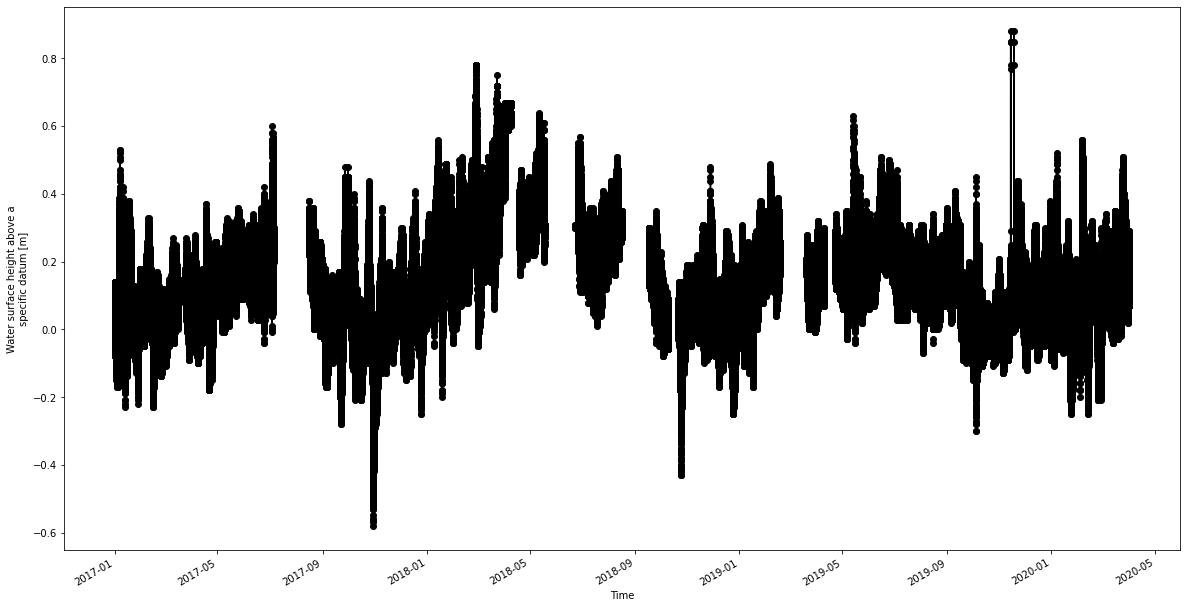

In [8]:
ds[param][:,0].plot(aspect=2, size=10, color='k', marker='o')

### 3.2. Subsetting Operations

Let's select an specific time range:

In [9]:
start = '2019-01-01'
end = '2019-12-30'

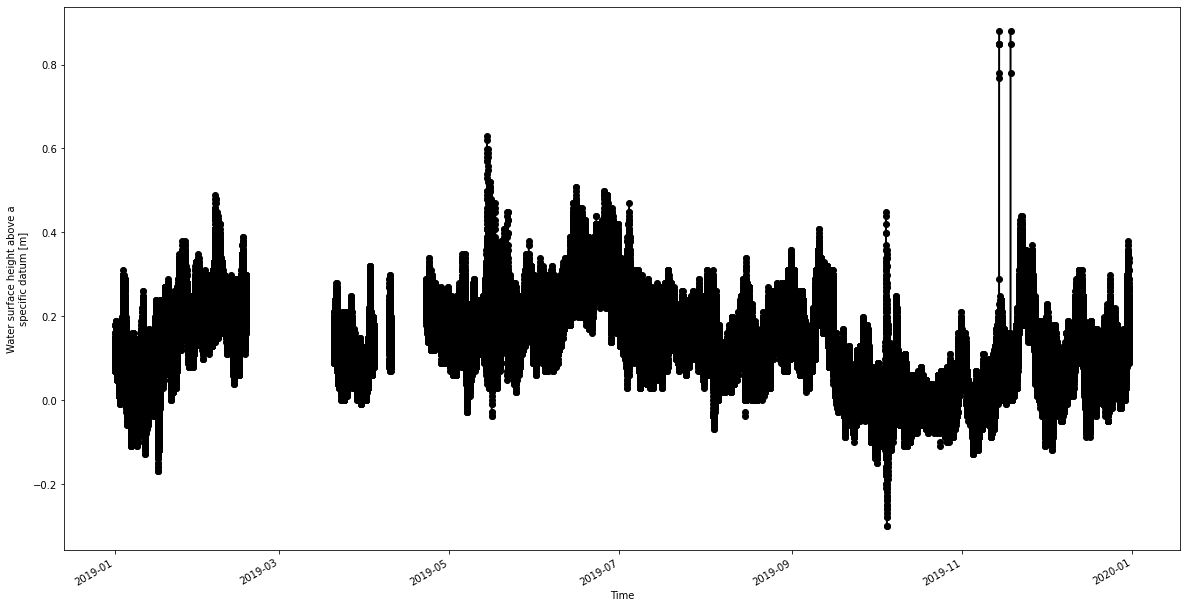

In [10]:
subset = ds[param][:,0].sel(TIME=slice(start, end))
subset.plot(aspect=2, size=10, color='k', marker='o')

### 3.3. Sampling Operations

We will upsample and downsample the above serie subset, not the original one, to better see the diferences.

#### 3.3.1. Selecting Good data (QC flags)

Is it there any bad data in the above time serie? `Run the next cell`to check the quality flags assigned to the parameter:

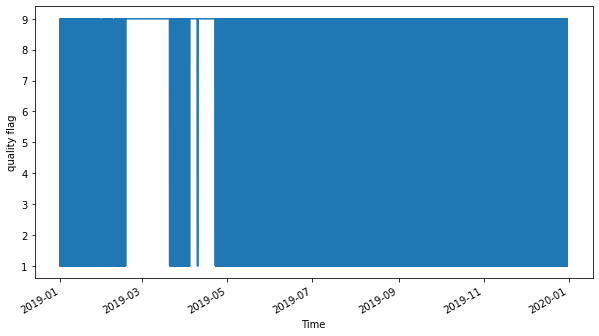

In [11]:
subset_QC = ds[param+'_QC'][:,0].sel(TIME=slice(start, end))
subset_QC.plot(aspect=2, size=5)

All In Situ TAC variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable. <br>
Let's check all posible 'QC' values: `run the next cell`

In [12]:
pd.DataFrame(data=ds[param+'_QC'][:,0].attrs['flag_values'],
             index=ds[param+'_QC'][:,0].attrs['flag_meanings'].split(' '), 
             columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


From the above list, users are recommended to use only the data flagged as 1; so that, when working with any of the variables, we will perfom first a data cleaning to use only the 'good data'.

If we wanted to do so (only if in the plot above we saw values different from 1 the operation would be:

In [13]:
subset_good = subset.where(subset_QC == 1)

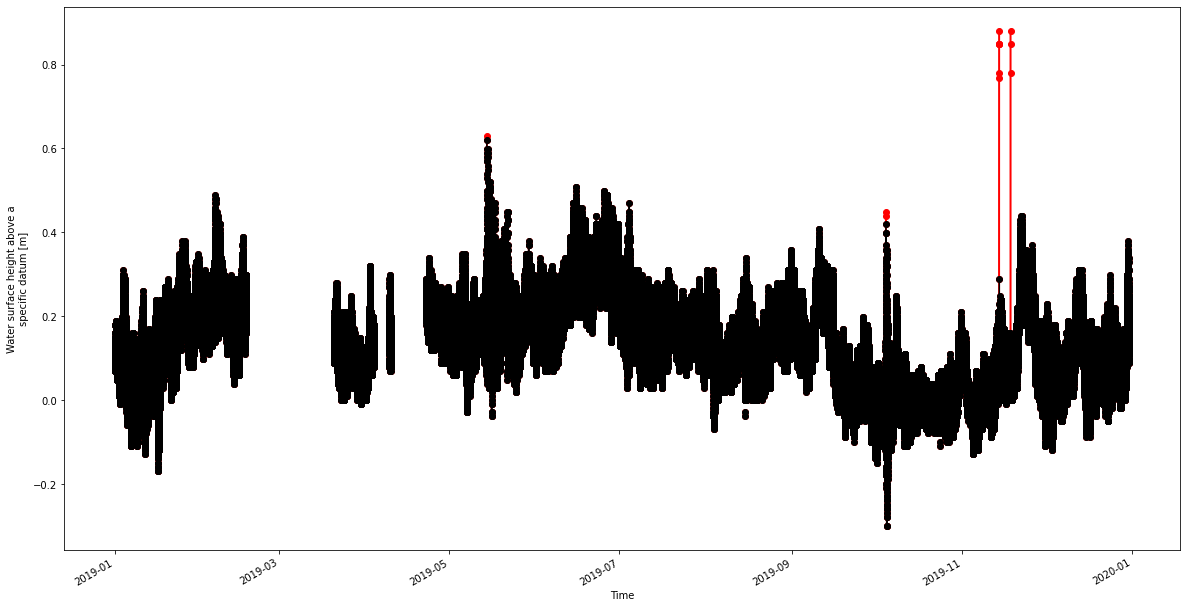

In [14]:
subset.plot(aspect=2, size=10, color='r', marker='o')#in red the bad data
subset_good.plot(color='k', marker='o')#in black the good data!!! :D

#### 3.3.2. Upsampling/Downsampling

<ul> <li>Downsamplig </li></ul>
Let's see next a downsampling example; this is, retrieveing less observations in a given period by agregating some-how <i>i.e mean of the original number of observations</i>. Let's get, by averaging, a mothly resolution sampling: `run the next cell`

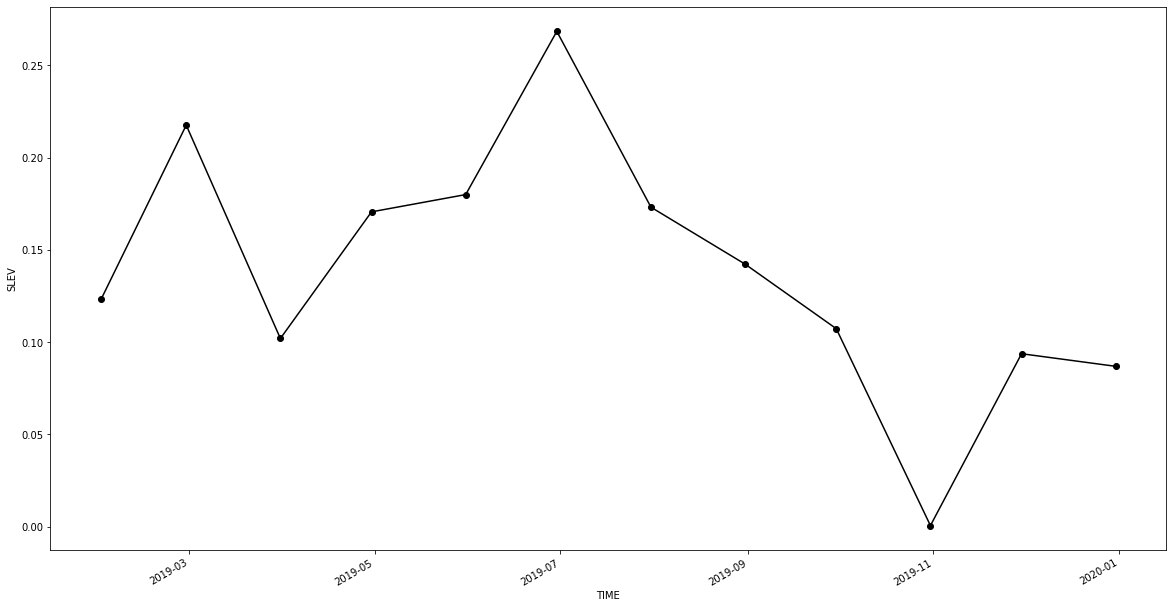

In [15]:
(subset_good.resample(TIME='1M').mean()).plot(aspect=2, size=10, color='k', marker='o')

<ul><li>Upsampling</ul></li>

Let's see next a upsampling example; this is, retrieveing more observations in a given period by inferring new ones some-how i.e <i>interpolating the original number of observations</i>. Let's get, by interpolating, a 0.5 minute resolution instead:

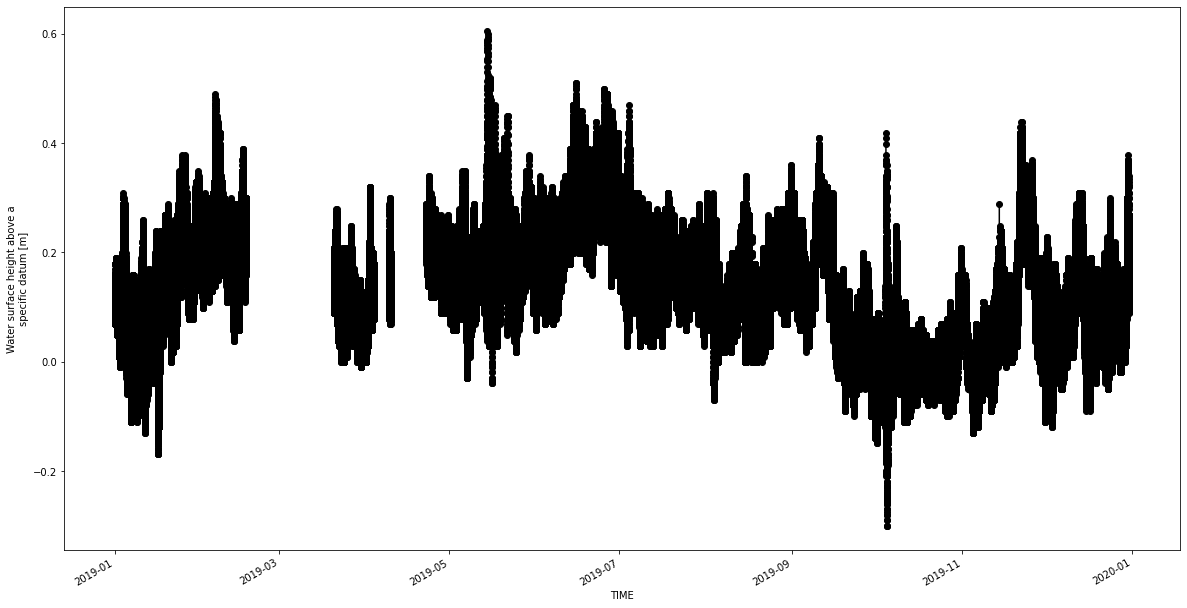

In [16]:
(subset_good.resample(TIME='0.5Min').interpolate('linear')).plot(aspect=2, size=10, color='k', marker='o')

### 3.4. Exporting data to csv

Let's export the full serie to csv.

1) `run the next cell` to create a dataframe:

In [17]:
dataframe = subset_good.to_dataframe()
dataframe.transpose()

TIME,2019-01-01 00:00:00.000000000,2019-01-01 00:00:59.999996416,2019-01-01 00:02:00.000002816,2019-01-01 00:02:59.999999232,2019-01-01 00:03:59.999995648,2019-01-01 00:05:00.000002304,2019-01-01 00:05:59.999998720,2019-01-01 00:06:59.999995136,2019-01-01 00:08:00.000001536,2019-01-01 00:08:59.999997952,...,2019-12-30 23:49:59.999995648,2019-12-30 23:51:00.000002048,2019-12-30 23:51:59.999998464,2019-12-30 23:53:00.000004864,2019-12-30 23:54:00.000001280,2019-12-30 23:54:59.999997696,2019-12-30 23:56:00.000004352,2019-12-30 23:57:00.000000768,2019-12-30 23:57:59.999997184,2019-12-30 23:59:00.000003584
SLEV,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,...,0.139,0.129,0.119,0.139,0.149,0.139,0.139,0.139,0.149,0.139


2) `run the next cell` to reset the time axis to readable dates

In [18]:
df_with_readable_time = dataframe.set_index(dataframe.index.astype(str).str[:19])
df_with_readable_time.transpose()

TIME,2019-01-01 00:00:00,2019-01-01 00:00:59,2019-01-01 00:02:00,2019-01-01 00:02:59,2019-01-01 00:03:59,2019-01-01 00:05:00,2019-01-01 00:05:59,2019-01-01 00:06:59,2019-01-01 00:08:00,2019-01-01 00:08:59,...,2019-12-30 23:49:59,2019-12-30 23:51:00,2019-12-30 23:51:59,2019-12-30 23:53:00,2019-12-30 23:54:00,2019-12-30 23:54:59,2019-12-30 23:56:00,2019-12-30 23:57:00,2019-12-30 23:57:59,2019-12-30 23:59:00
SLEV,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,0.129,...,0.139,0.129,0.119,0.139,0.149,0.139,0.139,0.139,0.149,0.139


3) Exporting dataframe to csv: `run the next cells`!

In [19]:
out_put_dir = os.getcwd() #by default: current working directory. Set a different path if you want

In [20]:
file_name = ds.attrs['platform_code']+'_time_serie.csv'
file_name

'Varna_time_serie.csv'

In [21]:
df_with_readable_time.to_csv(os.path.join(out_put_dir, file_name))

<div class="alert alert-block alert-info" style="margin-left: 2em">
<b>TIP</b>
    
***  
Check your output directory for the file exported and inspect the content!.
</div>

---



## 4. Wrap-up

So far you should already know how to deal with Time Serie data from fixed platforms (tide gauges, moorings, river flows...).<br> `If you don't please ask us! it is the moment!`